Surface Gravity (logg)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Relevant Parameters
------------------------

The 'logg' parameter defines the stellar surface gravity **at requiv** and is constrained by default.

**IMPORTANT NOTE**: as the `logg` parameter is defined to be the surface gravity given the value of `mass` and `requiv`, it may not be appropriate to compare or fix the value from an "observed" value of logg (from a spectrum, for example).

In [3]:
print(b.filter('logg', context='component'))

ParameterSet: 2 parameters
*         logg@primary@component: 4.43755187261
*       logg@secondary@component: 4.43755187261


In [4]:
print(b.filter('logg', context='constraint'))

ParameterSet: 2 parameters
         logg@primary@constraint: log10((({mass@primary@component} / ({requiv@primary@component} ** 2.000000)) * 0.000000000066740800000000003352) * 100.000000)
       logg@secondary@constraint: log10((({mass@secondary@component} / ({requiv@secondary@component} ** 2.000000)) * 0.000000000066740800000000003352) * 100.000000)


Flipping the Constraint
-----------------------------------

The `logg` constraint can be easily flipped so that `logg` is provided by the user in place of `requiv`.

See also:
 * [tutorial on constraints](./constraints.ipynb)
 * [flip_constraint API docs](../api/phoebe.frontend.bundle.Bundle.flip_constraint.md)

In [5]:
print(b.filter(qualifier=['logg', 'mass', 'requiv'], component='primary'))

ParameterSet: 5 parameters
        requiv@primary@component: 1.0 solRad
*         logg@primary@component: 4.43755187261
*         mass@primary@component: 0.998813135806 solMass
         logg@primary@constraint: log10((({mass@primary@component} / ({requiv@primary@component} ** 2.000000)) * 0.000000000066740800000000003352) * 100.000000)
         mass@primary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * (1.000000 + {q@binary@component})) * 2942.206217504418873431859537959099)


In [6]:
b.flip_constraint('logg@primary', solve_for='requiv')

<ConstraintParameter: {requiv@primary@component} = sqrt((({mass@primary@component} * 0.000000000066740800000000003352) * 100.000000) / (10.000000 ** {logg@primary@component})) (SI) => 0.999999999997 solRad>

In [7]:
print(b.filter(qualifier=['logg', 'mass', 'requiv'], component='primary'))

ParameterSet: 5 parameters
*       requiv@primary@component: 0.999999999997 solRad
          logg@primary@component: 4.43755187261
*         mass@primary@component: 0.998813135806 solMass
       requiv@primary@constraint: sqrt((({mass@primary@component} * 0.000000000066740800000000003352) * 100.000000) / (10.000000 ** {logg@primary@component}))
         mass@primary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * (1.000000 + {q@binary@component})) * 2942.206217504418873431859537959099)


Flipping `logg` to solve for the `mass` is a little more involved, as `mass` is already constrained by `period`, `sma` and `q`.  So we must first flip the `mass` constraint to solve for either `period` or `sma`.

In [8]:
print(b.filter(qualifier=['logg', 'mass', 'requiv'], component='secondary'))

ParameterSet: 5 parameters
      requiv@secondary@component: 1.0 solRad
*       logg@secondary@component: 4.43755187261
*       mass@secondary@component: 0.998813135806 solMass
       logg@secondary@constraint: log10((({mass@secondary@component} / ({requiv@secondary@component} ** 2.000000)) * 0.000000000066740800000000003352) * 100.000000)
       mass@secondary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * (1.000000 + (1.000000 / {q@binary@component}))) * 2942.206217504418873431859537959099)


In [9]:
b.flip_constraint('mass@secondary', solve_for='sma')

<ConstraintParameter: {sma@binary@component} = (((({mass@secondary@component} * ({period@binary@component} ** 2.000000)) * (1.000000 + (1.000000 / {q@binary@component}))) * 2942.206217504418873431859537959099) / 39.478418) ** (1./3) (solar units) => 5.3 solRad>

In [10]:
print(b.filter(qualifier=['logg', 'mass', 'requiv'], component='secondary'))

ParameterSet: 4 parameters
      requiv@secondary@component: 1.0 solRad
*       logg@secondary@component: 4.43755187261
        mass@secondary@component: 0.998813135806 solMass
       logg@secondary@constraint: log10((({mass@secondary@component} / ({requiv@secondary@component} ** 2.000000)) * 0.000000000066740800000000003352) * 100.000000)


In [11]:
b.flip_constraint('logg@secondary', solve_for='mass')

<ConstraintParameter: {mass@secondary@component} = (({requiv@secondary@component} ** 2.000000) * (10.000000 ** {logg@secondary@component})) / 0.000000006674080000000000593649 (SI) => 0.998813135807 solMass>

In [12]:
print(b.filter(qualifier=['logg', 'mass', 'requiv'], component='secondary'))

ParameterSet: 4 parameters
      requiv@secondary@component: 1.0 solRad
        logg@secondary@component: 4.43755187261
*       mass@secondary@component: 0.998813135807 solMass
       mass@secondary@constraint: (({requiv@secondary@component} ** 2.000000) * (10.000000 ** {logg@secondary@component})) / 0.000000006674080000000000593649


Input vs Observed
---------------------------------------

As mentioned above, the `logg` parameter is defined explicitly to be at `requiv` and may not be comparible directly to an estimation of logg from observations.  

To show this, we'll see that it can even differ from the flux-weighted loggs of the individual surface elements.

In [13]:
b.add_dataset('lc', dataset='lc01')
b.add_dataset('mesh', times=[0, 0.25], columns=['loggs', 'areas', 'mus', 'visibilities', 'abs_intensities@lc01', 'ldint@lc01'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [14]:
b.run_compute(irrad_method='none')

<ParameterSet: 34 parameters | datasets: mesh01, lc01>

Just by plotting the mesh at two different times/phases, we can already imagine that an "observed" logg could be time-dependent.

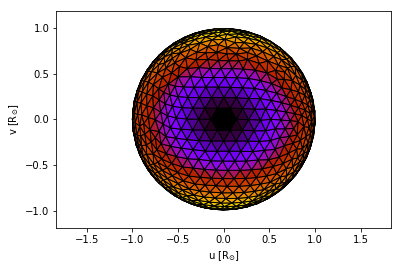

In [20]:
out = b['primary@mesh'].plot(time=0.0, fc='loggs', show=True)

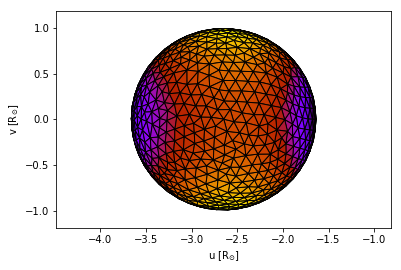

In [19]:
out = b['primary@mesh'].plot(time=0.25, fc='loggs', show=True)

Now we can manually compute the 'flux-weighted' logg from each of these times (similar to the way that RVs are computed to account for Rossiter-McLaughlin, but note that even flux-weighted loggs may not be a fair comparison to spectral-derived loggs).

In [31]:
for time in [0.0, 0.25]:
    ps = b.filter(time=time, component='primary', context='model')
    fluxes = ps.get_value('abs_intensities') * ps.get_value('areas') * ps.get_value('mus') * ps.get_value('ldint') * ps.get_value('visibilities')
    visible = ps.get_value('visibilities') > 0
    logg = np.average(ps.get_value('loggs')[visible], weights=fluxes[visible])
    print("time = {}, logg weighted = {}".format(time, logg))

time = 0.0, logg weighted = 4.44150721101
time = 0.25, logg weighted = 4.43427645581


In [29]:
print("logg parameter value = {}".format(b.get_value('logg', component='primary')))

logg parameter value = 4.43755187261
